# Udacity Sensor Fusion Nanodegree Program

This notebook contains algorithm implementation from Udacity Sensor Fusion Nanodegree. In the program, all the codes are implemented in C++, this notebook translates those codes into Python

## Lesson 1: Lidar Obstacle Detection

### Import libraries

In [29]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets

import random as rd

from math import sqrt

### Create datasets

In [12]:
n_samples = 1000
n_outliers = 50

X, Y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
Y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

### Plot input data

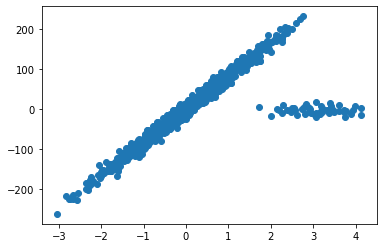

In [13]:
plt.plot(X, Y, 'o')

In [27]:
abs(-1)

1

### Use RANSAC algorithm for segmentation

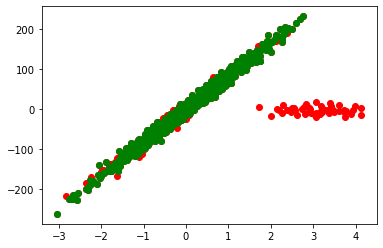

In [72]:
max_iter = 10
inliers = []

inliers_x = []
inliers_y = []

distanceTol = 0.1

while (max_iter > 0):
    
    #pick 2 random points
    index1 = rd.randrange(0,n_samples)
    index2 = rd.randrange(0,n_samples)
    
    x1 = X[index1]
    y1 = Y[index1]
    
    x2 = X[index2]
    y2 = Y[index2]
    
    a = (y1-y2)
    b = (x2-x1)
    c = (x1*y2-x2*y1)
    
    for i in range(0, n_samples):
        if(i in inliers):
            continue
            
        x3 = X[i]
        y3 = Y[i]
        
        d = abs(a*x3+b*y3+c)/sqrt(a*a+b*b)
        
        if (d<=distanceTol):
            inliers.append(i)
            inliers_x.append(X[i])
            inliers_y.append(Y[i])
            
    max_iter = max_iter-1
    
plt.plot(X, Y, 'or')
plt.plot(inliers_x, inliers_y, 'og')